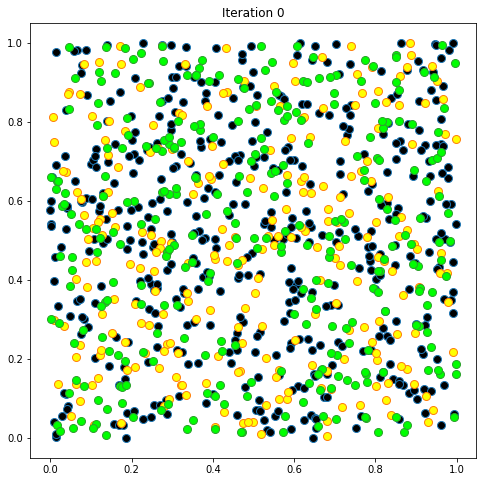

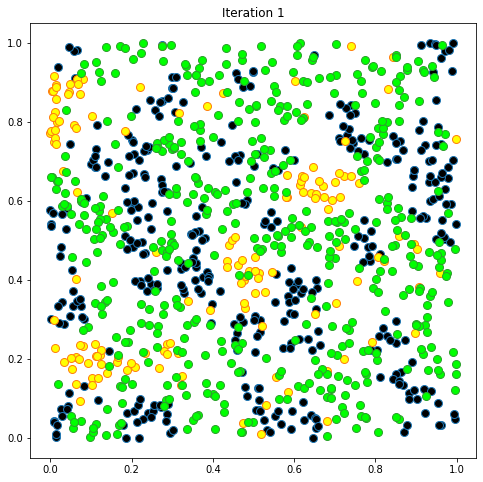

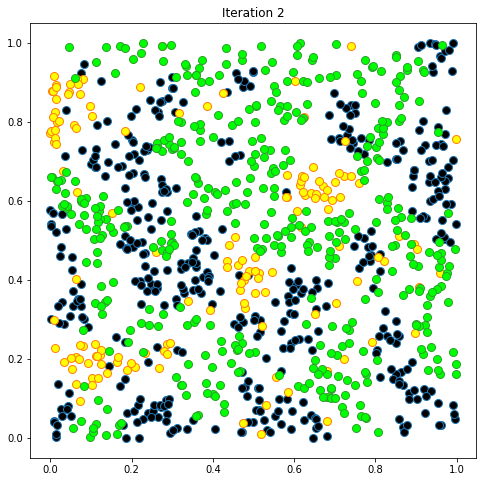

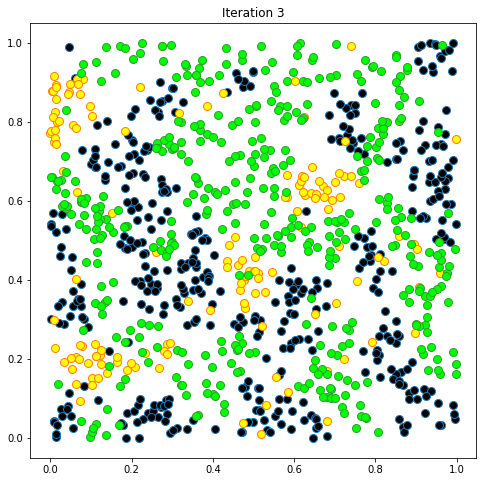

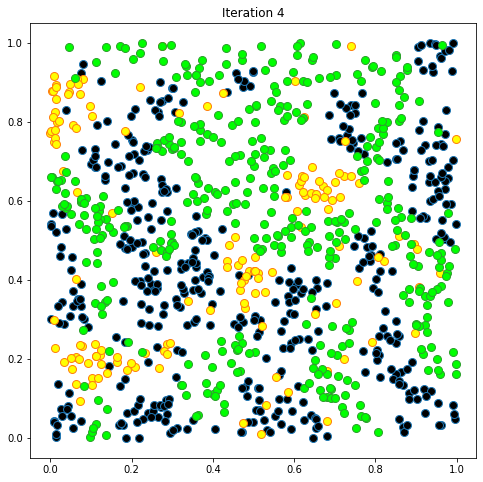

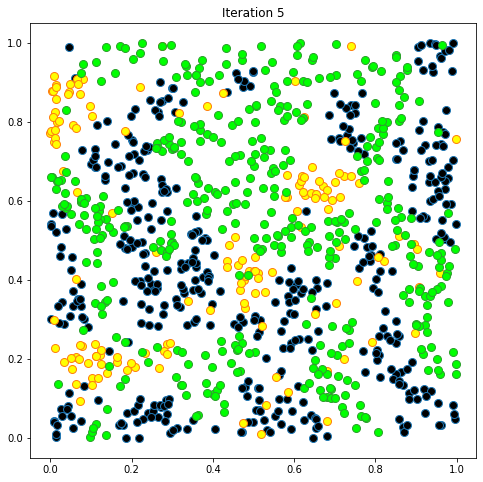

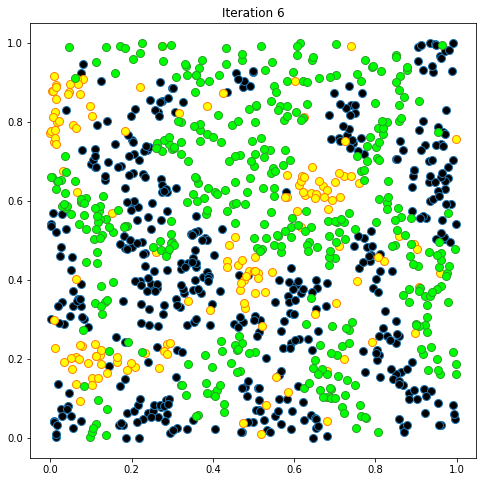

In [33]:
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

class Agent:

    def __init__(self, a_type, tol_p, friendly, fr_p, as_p):
        self.a_type = a_type
        self.change_location()
        self.tol = round(uniform(0, 1), 4)
        self.fr = round(uniform(0, 1), 2)
        self.friendly = friendly
        self.assimilation = random.randint(0, 100)

    def change_location(self):
        self.location = round(uniform(0, 1),4), round(uniform(0, 1),4)

    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort(key=lambda x: x[0])
        neighbors = [agent for d, agent in distances[:num_neighbors]]

        num_same_type = sum(self.a_type == agent.a_type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        while not self.happy(agents):
            if not self.friendly:
                if self.tol < tol_p and self.assimilation < as_p:
                    self.change_location()
                elif self.tol < tol_p and self.assimilation > as_p:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tol_p and self.assimilation < as_p:
                    self.change_location()
                else:
                    return
            else:
                if self.tol < tol_p and self.fr > fr_p and self.assimilation < as_p:
                    self.change_location()
                elif self.tol < tol_p and self.fr > fr_p and self.assimilation > as_p:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
            
                elif self.tol > tol_p and self.fr > fr_p and self.assimilation > as_p:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tol_p and self.fr > fr_p and self.assimilation < as_p:
                    self.change_location()
                elif self.tol < tol_p and self.fr < fr_p and self.assimilation < as_p:
                    self.change_location()
                elif self.tol < tol_p and self.fr < fr_p and self.assimilation > as_p:
                    self.change_location()    
                elif self.tol > tol_p and self.fr < fr_p and self.assimilation > as_p:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tol_p and self.fr < fr_p and self.assimilation < as_p:
                    self.change_location()
                else:
                    return
                    
def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.a_type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.a_type ==1:
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='lime', **plot_args)
    ax.set_title(f'Iteration {cycle_num-1}')
    plt.show()



num_of_type_0 = 450
num_of_type_1 = 250
num_of_type_2 = 300
num_neighbors = 10     
require_same_type = 5  
tol_p = 0.7
fr_p = 0.4
as_p = 30

agents = [Agent(0, tol_p, True, fr_p, as_p) for i in range(num_of_type_0)]
agents.extend(Agent(1, tol_p, False, fr_p, as_p) for i in range(num_of_type_1))
agents.extend(Agent(2, tol_p, True, fr_p, as_p) for i in range(num_of_type_2))

count = 1
while True:
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

In [34]:
l1 = []
for i in agents:
    l1.append(i.a_type)

In [37]:
t0=0
t1=0
t2=0
for i in l1:
    if i==0:
        t0+=1
    elif i==1:
        t1+=1
    else:
        t2+=1
print(t0,t1,t2)        

441 148 411
